# 21. We can clearly observe a weekend-effect in the number of daily travelers? However, some stations experience more travelers during the weekend. Which stations are this? Plot them on a map of Belgium and try to deduct a reasoning to what causes these stations to observe an opposed effect?

In [ ]:
%cd ..


In [ ]:
# import packages
from data_processing import data
import utils as utils
import numpy as np
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import matplotlib.pyplot as plt
import geopandas as gpd

In [9]:
data.travelers.head()

,Unnamed: 0,Station,week,saturday,sunday,sum
0,0,aalst,6444.0,1768.0,1592.0,9804.0
1,1,aalst-kerrebroek,27.0,0.0,0.0,NaN
2,2,aalter,2288.0,1055.0,855.0,4198.0
3,3,aarschot,6270.0,1954.0,1395.0,9619.0
4,4,aarsele,34.0,0.0,0.0,NaN


In [10]:
data.travelers = data.travelers[data.travelers['sunday'] + data.travelers['saturday'] > data.travelers['week']]

In [11]:
data.travelers.head()

,Unnamed: 0,Station,week,saturday,sunday,sum
13,13,anseremme,51.0,124.0,45.0,220.0
16,16,antwerpen-centraal,39628.0,23918.0,18553.0,82099.0
32,32,aywaille,180.0,87.0,95.0,362.0
57,57,bierges-walibi,146.0,504.0,562.0,1212.0
60,60,binche,335.0,187.0,154.0,676.0


In [12]:
stations = data.stations[["name","longitude","latitude"]]

In [13]:
# Standardize name for stations
stations['name'] = stations['name'].str.lower()
stations = stations.replace({"name": utils.Dict})

/tmp/ipykernel_29134/1214608936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['name'] = stations['name'].str.lower()


In [14]:
stations.head()


,name,longitude,latitude
3,aalst,4.039653,50.942813
4,aalst-kerrebroek,4.024407,50.948377
5,aalter,3.447848,51.092295
6,aarschot,4.824043,50.984406
7,aarsele,3.418363,50.984460


In [15]:
travelers = data.travelers.rename(index=str, columns={'Station': 'name'})

In [16]:
travelers.head()

,Unnamed: 0,name,week,saturday,sunday,sum
13,13,anseremme,51.0,124.0,45.0,220.0
16,16,antwerpen-centraal,39628.0,23918.0,18553.0,82099.0
32,32,aywaille,180.0,87.0,95.0,362.0
57,57,bierges-walibi,146.0,504.0,562.0,1212.0
60,60,binche,335.0,187.0,154.0,676.0


In [17]:
travelers = travelers.merge(stations, on='name')

In [18]:
travelers.head()

,Unnamed: 0,name,week,saturday,sunday,sum,longitude,latitude
0,13,anseremme,51.0,124.0,45.0,220.0,4.905530,50.238023
1,16,antwerpen-centraal,39628.0,23918.0,18553.0,82099.0,4.421101,51.217200
2,32,aywaille,180.0,87.0,95.0,362.0,5.672499,50.472938
3,57,bierges-walibi,146.0,504.0,562.0,1212.0,4.594746,50.707772
4,60,binche,335.0,187.0,154.0,676.0,4.172451,50.408764


In [19]:
# use !pip install geopandas to install package 

In [20]:
# read in file in geopandas data structure
map_df = gpd.read_file('./Data/Unprocessed/BELGIUM_-_Municipalities/BELGIUM_-_Municipalities.shp')

In [21]:
map_df.head()

,OBJECTID,ADMUNAFR,ADMUNADU,ADMUNAGE,Communes,CODE_INS,arrond,geometry
0,1,AARTSELAAR,AARTSELAAR,AARTSELAAR,Aartselaar,11001,11,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ..."
1,2,ANVERS,ANTWERPEN,ANTWERPEN,Antwerpen,11002,11,"POLYGON ((4.34109 51.35766, 4.34112 51.35760, ..."
2,3,BOECHOUT,BOECHOUT,BOECHOUT,Boechout,11004,11,"POLYGON ((4.52882 51.19051, 4.52971 51.19020, ..."
3,4,BOOM,BOOM,BOOM,Boom,11005,11,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ..."
4,5,BORSBEEK,BORSBEEK,BORSBEEK,Borsbeek,11007,11,"POLYGON ((4.48350 51.20315, 4.48354 51.20314, ..."


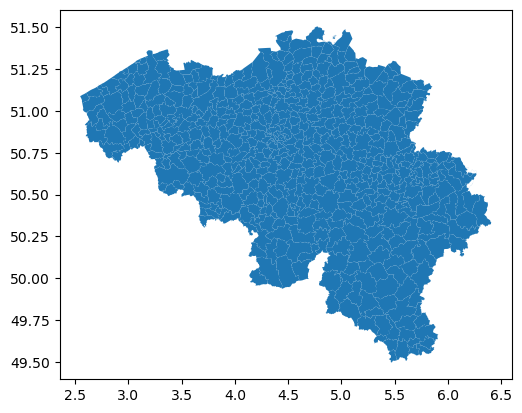

In [22]:
# show
map_df.plot()

In [23]:
dict = {'Name': travelers["name"], 'lat': travelers["latitude"], 'lon': travelers["longitude"]}
stations_df = pd.DataFrame(dict, columns = ['Name', 'lat', 'lon'])
stations_df

,Name,lat,lon
0,anseremme,50.238023,4.905530
1,antwerpen-centraal,51.217200,4.421101
2,aywaille,50.472938,5.672499
3,bierges-walibi,50.707772,4.594746
4,binche,50.408764,4.172451
...,...,...,...
69,vielsalm,50.278933,5.909211
70,watermaal/watermael,50.809170,4.399887
71,welkenraedt,50.659707,5.975381
72,yvoir,50.320840,4.878643


In [29]:
gdf = gpd.GeoDataFrame(
    stations_df, geometry=gpd.points_from_xy(stations_df.lon, stations_df.lat))

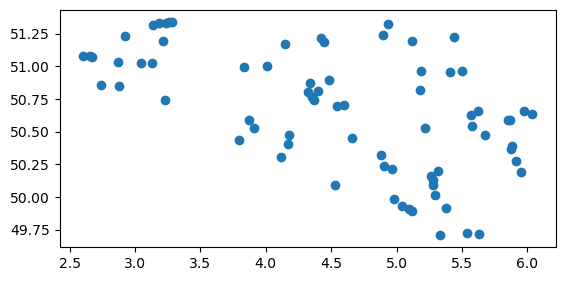

In [30]:
gdf.plot()

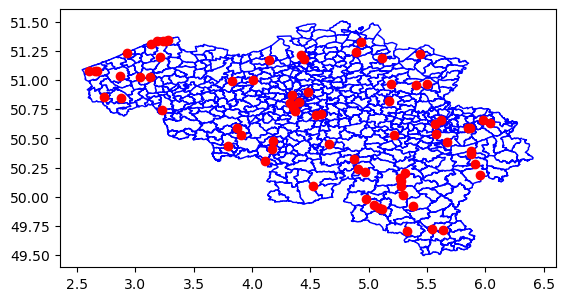

In [34]:
map_be = gpd.read_file('./Data/Unprocessed/BELGIUM_-_Municipalities/BELGIUM_-_Municipalities.shp')

ax = map_be.plot(
    color='white', edgecolor='blue')

# We can now plot those stations on the Belgium map
gdf.plot(ax=ax, color='red')

plt.show()

The possible reason why those stations have more traverls on weekends is because :
1. for stations near the seaside: people go for fun 
2. stations near the border: people go abroad 
3. big stations like brussel: people go for taking flight
etc